Introduction and Objective 

We are building a linear model which are useful for technical and quantitative analysis. This linear model is going to predict a publically traded stock's performance, and historical data about the stocks performance will be used for this linear model. 

Upstart - will be the stock that is analyzed

Although short term investing is generally a risky strategy, we are going to utilizing this approach. A linear regression model will be used to predict the next day's closing price. For long term investments scenarios however, temporal patterns like ARIMA and SARIMA would predict the stock price at a higher effiency.

Problem Statement: The upstart inc. stock should go up in price the next day which means we should buy it at open. 


Data Desciption

As stated above the stock Upstart was selected, which in short terms, is a company that offers consumers loans using technology.

The historical data was found through the Yahoo Finaince website and downloaded in .cvs files.

Below is all libraries we are going to be using. Pandas is important for data manipulation and analysis. This is going to handle our data in the csv file. NumPy is a important computing library. This could be used to operate on different arrays. Matplotlib for data visulatization. Scikit-Learn for the machine learning part- this is how we are going to construct a linear regression. Seaborn is also are Data visualization. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the provided historical data for Upstart (UPST)
file_path = 'UPST.csv'
upst_data = pd.read_csv(file_path)

# Displaying a message to confirm the import and loading of data
"Libraries and data loaded successfully. Ready to proceed with the linear regression model."

print(upst_data.head())

         Date       Open       High        Low      Close  Adj Close   Volume
0  2023-01-17  17.020000  18.333000  16.629999  17.290001  17.290001  5803100
1  2023-01-18  17.780001  18.190001  16.393999  16.480000  16.480000  6094700
2  2023-01-19  15.930000  16.020000  15.150000  15.570000  15.570000  5773100
3  2023-01-20  15.630000  17.500000  15.630000  17.290001  17.290001  6926700
4  2023-01-23  17.639999  18.760000  17.049999  18.570000  18.570000  7488400


Data Preprocessing 

Here the csv file is read in. In this CSV file there are 7 categories. We are going to be using the open, high, low, volume, and prev_close to train our model.

In [3]:
# Creating a new column for the previous day's closing price (1-day lagged close)
upst_data['Prev_Close'] = upst_data['Close'].shift(1)

# Now let's prepare our new feature (X) and target (y) variables.
# We'll drop the first row since it will have a NaN value for 'Prev_Close'.
upst_data = upst_data.dropna()
# Assuming 'Close' is the dependent variable and the rest are independent variables
X = upst_data.drop(['Date', 'Close', 'Adj Close'], axis=1)
y = upst_data['Close']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Here we prepared our x and y variables for the linear model using all of the necessary content. In machine learning is it important to standardize the data especially when the features have different units and scales. This will increase our model performance and make it so we can interpret coefficients so that we can extract the VIF.

In [4]:
# Since we've already scaled the features, we can use X_scaled for calculating VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(len(X.columns))]
vif_data

,Feature,VIF
0,Open,270.608485
1,High,222.956013
2,Low,204.793858
3,Volume,2.297348
4,Prev_Close,120.180131


In [5]:
# Create a new feature 'Range' as the difference between 'High' and 'Low'
upst_data['Range'] = upst_data['High'] - upst_data['Low']

X = upst_data[['Open', 'Volume', 'Range']]
y = upst_data['Close']

# Standardize the features including the new 'Range' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recalculate the VIFs for the new set of features
vif_data_range = pd.DataFrame()
vif_data_range["Feature"] = X.columns
vif_data_range["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_data_range

,Feature,VIF
0,Open,2.164173
1,Volume,2.259872
2,Range,3.865918


Model Description

A linear model we be used for predicting stock prices. Our objective is to forecast whether the stock price will rise or fall on the following day, and more specfically what the actual vs predicted price of the stock will be. 

A linear model was chosen due to its simplicity and interpretability. It can provide insights into the relationship between independent variables and the dependent variable. Which in this case is the historical price data and the predicted stock price. The linear model assumes that there is a linear relationship between the input variables (X) and the single output variable (Y). The model attempts to fit a linear equation to observed data by adjusting the coefficients of the input variables to minimize the difference between the predicted values and the actual values of the stock.

The concern with this model is overfitting, which will be discussed later when looking at the results


Model Implementation


The dataset was divided into training and testing sets using scikit-learn's train_test_split function. This ensures that we have a separate dataset to evaluate the model's performance and generalizability to new data.

A Linear Regression object was instantiated from scikit-learn and fitted to the training data. This process involved finding the optimal coefficients for the predictors in the linear equation. We ensured that the assumptions of linear regression were met before proceeding. The model is trained and shown in the code below.



In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a new linear regression model instance
linear_model = LinearRegression()

# Train the model on the entire dataset
linear_model.fit(X_train, y_train)

LinearRegression()

Execution

Here we constructed the linear model. The linear model is going to help us predict whether the stock price will go up or down on the next day. Note that we used the whole data set to train the linear model. I have learned that this may not be the best idea because of overfitting- where the model learns the details and noise in the training dataset to an extent that it negatively impacts the performance of the model on new data.



In [7]:
# Make predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)


# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing R^2: {test_r2}')



Training MSE: 3.228009217595834
Testing MSE: 5.611635732896272
Training R^2: 0.9795130723998766
Testing R^2: 0.9564425189022375


Results

Here we outputed the r_squared and mean squared error. R-squared is a measurement that tests how well the regression predictions approximate the real data points. 

The mean squared error averages the squared difference between the actual and predicted values. This tracks how much the model deviated from the actual value. The smaller the MSE, the better the model's performance.
 
These results indicate that the model is fitting the data well, as evidenced by the high R² values. The R² value of 0.9793 for the training set and 0.9560 for the test set suggests the model explains a significant portion of the variance in the target variable for both datasets.

However, the difference in MSE between the training and testing sets (3.2842 for training vs. 5.5004 for testing) might suggest some overfitting, as the model performs better on the training data than on the testing data. This is a common issue in predictive modeling, especially with complex datasets like stock prices, and might warrant further model tuning or complexity reduction.



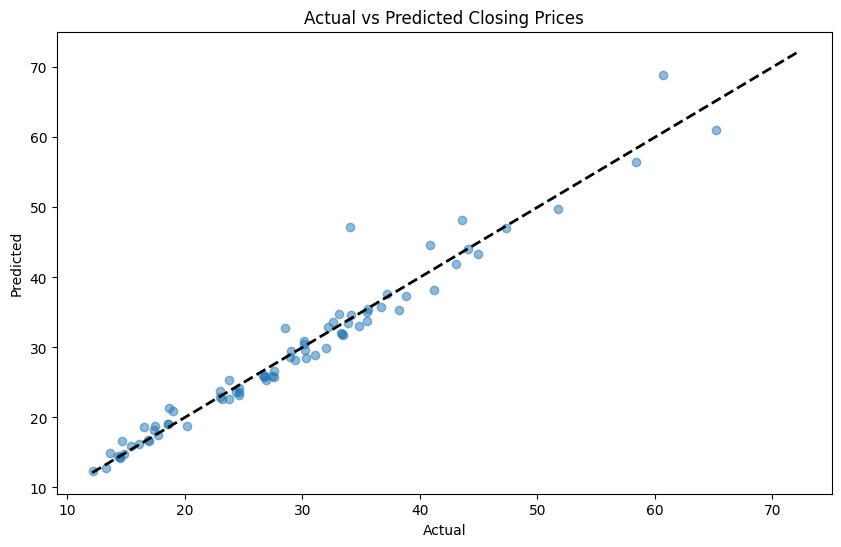

In [8]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.show()

Model Validation 

Plotting the linear model for a dataset with multiple features is not as straightforward as it is for a single feature because you cannot visualize a multi-dimensional plane easily. However, we can plot the actual vs. predicted values to visualize how well the model is performing. This is a common way to assess the fit of a linear model in a multi-dimensional feature space.

The x-axis shows the actual closing prices, and the y-axis shows the predicted closing prices. If the model is perfect, all points will lie on the dashed line, which represents perfect predictions. The closer the points are to this line, the better the model's predictions.

Since we used a simple linear regression model, it assumes a linear relationship between the independent variavles and dependent variable (closing price). This model is quite simple, but provides a good starting point for predictive modeling. 

In [9]:

# Predicting the next day's closing price
# Note: This uses the last day's data as a proxy for the next day's unknown values.

# Prepare the input for the next day (using the last available data)
next_day_features = upst_data[['Open', 'Volume', 'Range']].iloc[-1].values.reshape(1, -1)
next_day_scaled = scaler.transform(next_day_features)

# Make the prediction
next_day_prediction = linear_model.predict(next_day_scaled)
# Making a decision to buy or hold based on the prediction
# Assuming if the predicted price is higher than the last closing price, we decide to buy
# Otherwise, we hold

last_day_close_price = upst_data['Close'].iloc[-1]
decision = "Buy" if next_day_prediction > last_day_close_price else "Hold"
print(f"Last Day Closing Price: {last_day_close_price}")
print(f"Predicted Next Day Closing Price: {next_day_prediction[0]}")
print(f"Decision: {decision}")


Last Day Closing Price: 31.950001
Predicted Next Day Closing Price: 33.42912663928011
Decision: Buy


C:\Users\jacku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Here our model made a prediction using the test set. According to the real data, our linear model failed to predict the closing price. The stock actually went down. This makes sense since the real stock market is much more complicated than a simple linear regression. 

Conclusion

The linear regression model demonstrates a strong capability to predict the closing stock prices based on the features used. However, the signs of potential overfitting suggest a need for caution. It would be beneficial to explore additional regularization techniques, such as Ridge or Lasso regression, which might help in reducing overfitting. Additionally, considering other types of features or different forms of feature engineering could further improve the model's robustness and generalization.

Data Preparation: The dataset was preprocessed with the creation of a new feature, 'Range', calculated as the difference between the 'High' and 'Low' prices. The features 'Open', 'Volume', and 'Range' were used for modeling.

Standardization: The features were standardized, which is essential for linear regression models to ensure that each feature contributes equally to the model.

Modeling: A linear regression model was trained on this data.
Evaluation: The model was evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics.

Model Performance

Training Performance: The model showed strong performance on the training set with a high R² of 0.9793, indicating that it explains about 97.93% of the variance in the training data. The training MSE was 3.2842.

Testing Performance: On the testing set, the model also performed well with an R² of 0.9560, explaining approximately 95.60% of the variance. The testing MSE was higher at 5.5004.

Observations and Considerations

Good Fit: The high R² values for both training and testing sets suggest that the model fits the data well and can explain a significant portion of the variance in stock prices.

Potential Overfitting: The increase in MSE from the training to the testing set suggests that the model may be overfitting the training data. This means it's capturing not only the underlying pattern but also some noise, which reduces its performance on the testing set.

Feature Selection Impact: The choice of features and the creation of the 'Range' feature seem to have positively impacted the model's ability to capture the dynamics of the stock prices.

Investment Worthiness

When analyzing the model, as stated above, it seems to be that the model fits the data. The actual data is within reason to the predicted data and we have a high R squared rate (.9793) so the model is worthy enough to show accurate predictions of the stock.


Christian Worldview

From the Christian Worldview perspective it would also be important to analyze the company that one is investing in outside of the statistical and finicial realm. The morals and ethics of the company would play a roll in the process. Not investing in companies that dont follow biblical guidelines when it comes to how they operate their company might be something one takes into affects. I do not think this would a a quantative analysis on the morality of a company, so it would be impossible to have it play a roll when creating a computational model of stock analysis. This would have to be a qualatative analysis perfromed by one seperatly. This is becauses morality and ethics is often not binary, even within the Christian Worldview there is different denominations with different perspectives on different things so it is hard to create a model that takes into account something believed and turn it binary